**Lab2-DL: E1-emosjoner-bygging.ipynb** (ELMED219) | Prioritet: 3 (valgfri)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/E1-emosjoner-bygging.ipynb)

# 😊 E1: CNN-klassifikasjon av ansiktsuttrykk - Del 1 (Bygging)

Denne notebook demonstrerer hvordan **Konvolusjonelle Nevrale Nettverk (CNN)** kan brukes til å klassifisere ansiktsuttrykk og emosjoner.

---

## 🎯 Læringsmål

| Mål | Beskrivelse |
|-----|-------------|
| **Forstå datasettet** | Lære om FER2013 og de 6 universelle emosjonene |
| **Bygge CNN** | Konstruere en CNN-arkitektur for bildeklassifikasjon |
| **Forstå pipeline** | Data → Preprosessering → Modell → Trening |
| **Medisinsk kobling** | Se paralleller til klinisk bildeanalyse |

---

## 📊 FER2013 Datasettet

**FER2013** (Facial Expression Recognition 2013) er et klassisk datasett for emosjonsgjenkjenning:

| Egenskap | Verdi |
|----------|-------|
| **Antall bilder** | ~35,000 |
| **Oppløsning** | 48×48 piksler |
| **Format** | Gråtoner |
| **Klasser** | 6 emosjoner |

### De 6 emosjonsklassene (norsk/engelsk)

| Klasse | Norsk | Engelsk | Emoji | Beskrivelse |
|--------|-------|---------|-------|-------------|
| 0 | **Avsky** | Disgust | 🤢 | Ubehag, kvalme, motvilje |
| 1 | **Frykt** | Fear | 😨 | Redsel, angst, bekymring |
| 2 | **Glede** | Happy | 😊 | Lykke, tilfredshet, smil |
| 3 | **Tristhet** | Sad | 😢 | Sorg, nedstemthet, melankoli |
| 4 | **Overraskelse** | Surprise | 😲 | Forbauselse, sjokk |
| 5 | **Nøytral** | Neutral | 😐 | Ingen spesiell emosjon |

> 💡 **Merk:** Opprinnelig hadde FER2013 7 klasser, men **"Anger" (sinne)** er fjernet fra denne versjonen.

---

## 🏥 Medisinsk relevans

Emosjonsgjenkjenning med CNN har flere kliniske anvendelser:

| Anvendelse | Beskrivelse |
|------------|-------------|
| **Psykiatri** | Vurdere stemningsleie hos pasienter med depresjon |
| **Nevrologi** | Oppdage ansiktsuttrykk ved Parkinsons sykdom |
| **Smertebehandling** | Automatisk smertevurdering hos pasienter |
| **Autisme** | Støtte for emosjonsgjenkjenning |
| **Geriatri** | Monitorere demenspasienter |

---

## 📐 Matematisk formulering

I maskinlæring kan vi uttrykke emosjonsklassifikasjonsproblemet som:

$$\hat{y} = f(X, \theta)$$

Hvor:
- $\hat{y}$ = predikert emosjon (0–5)
- $X$ = input ansiktsbilde (48×48 = 2304 pikselverdier)
- $\theta$ = modellparametere (CNN-vekter)
- $f$ = CNN-arkitekturen (ikke-lineær funksjon)

Dette er **identisk** med medisinsk bildeanalyse – bare med forskjellige klasser!

## 🔗 Sammenligning: Emosjoner vs Medisinske Bilder

| Aspekt | Emosjonsgjenkjenning | Medisinsk Bildeanalyse |
|--------|---------------------|------------------------|
| **Input (X)** | 48×48 gråtoner av ansikter | MRI, røntgen, CT |
| **Klasser (y)** | 6 emosjoner | Sykdomstilstander |
| **Utfordringer** | Mikro-uttrykk, kulturelle forskjeller | Anatomisk variasjon |
| **Konsekvenser av feil** | Psykologisk vurdering | Medisinsk diagnose |
| **Datamengde** | Tusener av bilder | Ofte begrenset |

**Felles prinsipper:**
- ✅ Begge krever **domenekunnskap** for tolkningsvalidering
- ✅ Begge har problemer med **ubalanserte klasser**
- ✅ Begge trenger **robuste modeller** som generaliserer
- ✅ Begge har **etiske implikasjoner** (bias, personvern)

## 🔧 Miljøoppsett og datanedlasting

### Oversikt

Denne notebooken krever:
1. **Python-pakker**: PyTorch, OpenCV, NumPy, etc.
2. **FER2013 datasettet**: ~35,000 ansiktsbilder

---

### 📥 FER2013 Nedlasting - Detaljert veiledning

FER2013 er tilgjengelig via **Kaggle**. Du har **tre alternativer**:

---

#### **Alternativ A: Automatisk nedlasting med Kaggle API (anbefalt)**

**Steg 1:** Opprett en Kaggle-konto på [kaggle.com](https://www.kaggle.com)

**Steg 2:** Generer API-nøkkel:
1. Logg inn på Kaggle
2. Klikk på profilikonet (øverst til høyre) → **Settings**
3. Scroll ned til **API** → **Create New API Token**
4. En fil `kaggle.json` lastes ned

**Steg 3:** Plasser API-nøkkelen:

```bash
# Mac/Linux
mkdir -p ~/.kaggle
mv ~/Downloads/kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json

# Windows (PowerShell)
mkdir $env:USERPROFILE\.kaggle
move $env:USERPROFILE\Downloads\kaggle.json $env:USERPROFILE\.kaggle\
```

**Steg 4:** Kjør kodecellen nedenfor - datasettet lastes ned automatisk!

---

#### **Alternativ B: Manuell nedlasting fra Kaggle**

1. Gå til: [kaggle.com/datasets/msambare/fer2013](https://www.kaggle.com/datasets/msambare/fer2013)
2. Klikk **Download** (krever innlogging)
3. Pakk ut ZIP-filen
4. Plasser innholdet i: `Lab2-DL/data/ansiktsuttrykk/FER2013/`

Forventet struktur etter utpakking:
```
Lab2-DL/data/ansiktsuttrykk/FER2013/
├── train/
│   ├── angry/     (tom i noen versjoner)
│   ├── disgust/
│   ├── fear/
│   ├── happy/
│   ├── sad/
│   ├── surprise/
│   └── neutral/
└── test/
    ├── angry/
    ├── disgust/
    ...
```

---

#### **Alternativ C: Google Colab med Kaggle Secrets**

I Colab kan du lagre Kaggle-legitimasjon som "Secrets":
1. Klikk 🔑-ikonet i venstre panel
2. Legg til:
   - `KAGGLE_USERNAME` = ditt brukernavn
   - `KAGGLE_KEY` = API-nøkkelen fra `kaggle.json`
3. Aktiver "Notebook access" for begge

---

### ⚠️ Viktig om FER2013

- **Lisens**: Ikke-kommersiell bruk
- **Personvern**: Bildene er anonymisert (lav oppløsning)
- **Kvalitet**: Noen bilder er feilmerket (realistisk for medisinsk data!)
- **Ubalanse**: "Disgust" (avsky) har færrest bilder

In [5]:
import sys
import subprocess
import os

# Sjekk om vi kjører i Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("🚀 Kjører i Google Colab")
else:
    print("💻 Kjører i lokal miljø")

💻 Kjører i lokal miljø


In [6]:
if IN_COLAB:
    # Gå til root-mappen
    os.chdir('/content')
    
    # Sjekk nåværende mappe
    print(f"Nåværende mappe: {os.getcwd()}")
    
    # Sjekk om mappen allerede eksisterer
    if os.path.exists('ELMED219-2026/Lab2-DL'):
        print("✅ ELMED219-2026/Lab2-DL mappen eksisterer allerede!")
        
        # Sjekk innholdet
        print("\n📁 Innhold i ELMED219-2026/Lab2-DL mappen:")
        try:
            result = subprocess.run(['ls', '-la', 'ELMED219-2026/Lab2-DL'], 
                                  capture_output=True, text=True, check=True)
            print(result.stdout)
        except subprocess.CalledProcessError as e:
            print(f"❌ Kunne ikke liste innhold: {e}")
        
        # Sjekk om det er en git repository
        if os.path.exists('ELMED219-2026/Lab2-DL/.git'):
            print("\n✅ Dette er en git repository!")
            
            # Gå inn i mappen og oppdater
            os.chdir('ELMED219-2026/Lab2-DL')
            print(f"📁 Byttet til: {os.getcwd()}")
            
            # Prøv å oppdatere repositoryet
            try:
                result = subprocess.run(['git', 'pull'], 
                                      capture_output=True, text=True, check=True)
                print("✅ Repository oppdatert!")
                print(result.stdout)
            except subprocess.CalledProcessError as e:
                print(f"⚠️ Kunne ikke oppdatere repository: {e}")
                print("Men mappen eksisterer og kan brukes!")
        else:
            print("⚠️ Dette ser ikke ut som en git repository")
            
    else:
        print("�� Mappen eksisterer ikke - prøver git clone...")
        try:
            result = subprocess.run(['git', 'clone', 'https://github.com/arvidl/ELMED219-2026.git'], 
                                  capture_output=True, text=True, check=True)
            print("✅ Repository klonet vellykket!")
            print(result.stdout)
        except subprocess.CalledProcessError as e:
            print(f"❌ Git clone feilet: {e}")
            print(f"Error output: {e.stderr}")

In [7]:
if IN_COLAB:
    !pip install opencv-python --quiet
    !pip install tqdm --quiet
    !pip install torchsummary --quiet

In [8]:
# Imports og setup med feilhåndtering
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import os
import requests
import zipfile
from PIL import Image
import cv2
from tqdm import tqdm
import warnings
import pickle
from pathlib import Path
warnings.filterwarnings('ignore')

# Sjekk om GPU eller MPS er tilgjengelig og sett enhet (device)
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f'🚀 GPU tilgjengelig: {torch.cuda.get_device_name(0)}')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print(' Apple Silicon MPS tilgjengelig')
else:
    device = torch.device('cpu')
    print('💻 Bruker CPU')

print(f'Bruker enhet: {device}')

# Definer emosjonsklasser med norske navn
EMOSJONER_NORSK = {
    0: 'Avsky',
    1: 'Frykt', 
    2: 'Glede',
    3: 'Tristhet',
    4: 'Overraskelse',
    5: 'Nøytral'
}

EMOSJONER_ENGELSK = {
    0: 'disgust',
    1: 'fear',
    2: 'happy', 
    3: 'sad',
    4: 'surprise',
    5: 'neutral'
}

EMOJIS = {
    0: '🤢',
    1: '😨',
    2: '😊',
    3: '😢',
    4: '😲',
    5: '😐'
}

print("✅ Emosjonsklasser definert:")
for k, v in EMOSJONER_NORSK.items():
    print(f"   {EMOJIS[k]} Klasse {k}: {v} ({EMOSJONER_ENGELSK[k]})")

# Sett random seeds for reproduserbarhet
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

 Apple Silicon MPS tilgjengelig
Bruker enhet: mps
✅ Emosjonsklasser definert:
   🤢 Klasse 0: Avsky (disgust)
   😨 Klasse 1: Frykt (fear)
   😊 Klasse 2: Glede (happy)
   😢 Klasse 3: Tristhet (sad)
   😲 Klasse 4: Overraskelse (surprise)
   😐 Klasse 5: Nøytral (neutral)


## 1. Data Lasting og Forberedelse

### 📊 FER2013 Datasett - Detaljer

**FER2013** (Facial Expression Recognition 2013) er et referansedatasett for emosjonsgjenkjenning:

| Egenskap | Verdi |
|----------|-------|
| **Totalt bilder** | ~35,887 |
| **Oppløsning** | 48×48 piksler |
| **Fargerom** | Gråtoner (1 kanal) |
| **Klasser** | 6 emosjoner |
| **Trening** | ~28,709 bilder |
| **Test** | ~7,178 bilder |

---

### De 6 emosjonsklassene med norske navn

```
┌─────────┬─────────────────┬───────────┬───────┐
│ Klasse  │ Norsk           │ Engelsk   │ Emoji │
├─────────┼─────────────────┼───────────┼───────┤
│    0    │ Avsky           │ disgust   │  🤢   │
│    1    │ Frykt           │ fear      │  😨   │
│    2    │ Glede           │ happy     │  😊   │
│    3    │ Tristhet        │ sad       │  😢   │
│    4    │ Overraskelse    │ surprise  │  😲   │
│    5    │ Nøytral         │ neutral   │  😐   │
└─────────┴─────────────────┴───────────┴───────┘
```

### Klasseubalanse (typisk for FER2013)

```
                                      Antall bilder (ca.)
Glede       😊 ████████████████████████████████████  7,215
Nøytral     😐 █████████████████████████            4,965
Tristhet    😢 ████████████████████████             4,830
Frykt       😨 ████████████████████                 4,097
Overraskelse😲 ████████████████████                 3,171
Avsky       🤢 ███                                   547
```

> ⚠️ **Klasseubalanse:** "Avsky" har betydelig færre bilder. Dette er vanlig i kliniske datasett og påvirker modelltrening!

---

### Datasettstruktur etter organisering

```
Lab2-DL/data/ansiktsuttrykk/FER2013/
├── train/              # ~80% av data
│   ├── disgust/        # Avsky
│   ├── fear/           # Frykt
│   ├── happy/          # Glede
│   ├── sad/            # Tristhet
│   ├── surprise/       # Overraskelse
│   └── neutral/        # Nøytral
├── val/                # ~15% av data (fra train)
│   └── ... (samme struktur)
└── test/               # ~5% av data
    └── ... (samme struktur)
```

In [9]:
def hent_fer2013_dataset():
    """
    Hent FER2013 datasettet fra Kaggle.
    
    Bruker Kaggle Python API for mer robust nedlasting.
    """
    print("📥 Henter FER2013 datasett")
    print("=" * 50)
    
    data_dir = Path("../data/ansiktsuttrykk/FER2013")
    data_dir.mkdir(parents=True, exist_ok=True)
    
    # Sjekk om data allerede eksisterer
    existing_images = list(data_dir.glob("**/*.png")) + list(data_dir.glob("**/*.jpg"))
    
    if len(existing_images) > 100:  # Mer enn 100 bilder = sannsynligvis komplett
        print(f"✅ Data allerede eksisterer: {len(existing_images)} bilder")
        return True
    
    # Prøv å laste ned fra Kaggle
    try:
        if IN_COLAB:
            # I Colab: Installer kaggle og bruk Secrets
            import subprocess
            subprocess.run(['pip', 'install', 'kaggle', '--quiet'], check=True)
            
            from google.colab import userdata
            try:
                os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
                os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
                print("✅ Kaggle credentials lastet fra Colab Secrets!")
            except Exception as e:
                print(f"❌ Kunne ikke laste Kaggle Secrets: {e}")
                print("\n📋 Instruksjoner:")
                print("1. Klikk 🔑-ikonet i venstre panel")
                print("2. Legg til KAGGLE_USERNAME og KAGGLE_KEY")
                print("3. Aktiver 'Notebook access'")
                return False
        
        # Prøv Kaggle Python API først
        try:
            from kaggle.api.kaggle_api_extended import KaggleApi
            
            print("🔄 Bruker Kaggle Python API...")
            api = KaggleApi()
            api.authenticate()
            
            # Last ned datasettet
            print("📥 Laster ned FER2013 (dette kan ta noen minutter)...")
            api.dataset_download_files(
                'msambare/fer2013',
                path=str(data_dir),
                unzip=True
            )
            print("✅ Nedlasting fullført!")
            
        except ImportError:
            # Fallback til CLI
            print("⚠️ Kaggle Python API ikke tilgjengelig, prøver CLI...")
            
            import subprocess
            result = subprocess.run([
                "kaggle", "datasets", "download",
                "-d", "msambare/fer2013",
                "-p", str(data_dir), "--unzip"
            ], capture_output=True, text=True)
            
            if result.returncode != 0:
                raise Exception(f"CLI-feil: {result.stderr}")
            print("✅ Nedlasting fullført via CLI!")
        
        # Verifiser nedlasting
        downloaded_images = list(data_dir.glob("**/*.png")) + list(data_dir.glob("**/*.jpg"))
        if len(downloaded_images) > 100:
            print(f"✅ Verifisert: {len(downloaded_images)} bilder lastet ned")
            return True
        else:
            print(f"⚠️ Kun {len(downloaded_images)} bilder funnet - sjekk nedlastingen")
            return False
            
    except Exception as e:
        print(f"❌ Automatisk nedlasting feilet: {e}")
        print("\n" + "=" * 50)
        print("📋 MANUELL NEDLASTING:")
        print("=" * 50)
        print("1. Gå til: https://www.kaggle.com/datasets/msambare/fer2013")
        print("2. Logg inn på Kaggle")
        print("3. Klikk 'Download'")
        print(f"4. Pakk ut til: {data_dir.absolute()}")
        print("\nEtter manuell nedlasting, kjør denne cellen på nytt!")
        return False


In [10]:
%%time
# Hent data (hvis ikke allerede lastet ned)
success = hent_fer2013_dataset()

📥 Henter FER2013 datasett
🔄 Bruker Kaggle Python API...
📥 Laster ned FER2013 (dette kan ta noen minutter)...
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
✅ Nedlasting fullført!
✅ Verifisert: 35887 bilder lastet ned
CPU times: user 1.32 s, sys: 2.87 s, total: 4.19 s
Wall time: 8.44 s


In [11]:
def organiser_fer2013_dataset():
    """
    Organiser FER2013 datasettet i train/val/test mapper
    """
    print("🔧 Organiserer FER2013 datasett")
    print("=" * 50)
    
    data_dir = Path("../data/ansiktsuttrykk/FER2013")
    
    # Emosjonsklasser
    emotion_classes = {
        0: 'disgust', 
        1: 'fear',
        2: 'happy',
        3: 'sad',
        4: 'surprise',
        5: 'neutral'
    }
    
    # Opprett undermapper for alle splits og emosjonsklasser
    for split in ['train', 'val', 'test']:
        for emotion in emotion_classes.values():
            (data_dir / split / emotion).mkdir(parents=True, exist_ok=True)
    
    # Sjekk om data allerede er organisert
    val_images = list((data_dir / "val").glob("**/*.png")) + list((data_dir / "val").glob("**/*.jpg"))
    
    if val_images:
        print("✅ Data allerede organisert!")
        return True
    
    # Hvis val-mappen er tom, flytt bilder fra train
    print("🔄 Val-mappen er tom - flytter bilder fra train...")
    
    total_moved = 0
    
    # Gå gjennom hver emosjonsklasse
    for emotion in emotion_classes.values():
        train_emotion_dir = data_dir / "train" / emotion
        val_emotion_dir = data_dir / "val" / emotion
        
        # Finn alle bilder i denne emosjonsklassen
        emotion_images = list(train_emotion_dir.glob("*.png")) + list(train_emotion_dir.glob("*.jpg"))
        
        if not emotion_images:
            print(f"  ⚠️ {emotion}: Ingen bilder funnet i train")
            continue
            
        # Flytt 15% av bildene til val
        val_count = int(len(emotion_images) * 0.15)
        
        if val_count > 0:
            print(f"  {emotion}: {len(emotion_images)} bilder → flytter {val_count} til val")
            
            # Flytt bildene
            moved_count = 0
            for image_path in emotion_images:
                if moved_count >= val_count:
                    break
                    
                # Opprett ny sti i val-mappen
                val_path = val_emotion_dir / image_path.name
                
                # Flytt bildet
                try:
                    image_path.rename(val_path)
                    moved_count += 1
                    total_moved += 1
                except Exception as e:
                    print(f"⚠️ Kunne ikke flytte {image_path.name}: {e}")
        else:
            print(f"  {emotion}: {len(emotion_images)} bilder → ingen flyttet (for få bilder)")
    
    print(f"✅ Flyttet totalt {total_moved} bilder til val!")
    
    # Vis statistikk
    print("\n�� Ny organisering:")
    for split in ['train', 'val', 'test']:
        split_images = list((data_dir / split).glob("**/*.png")) + list((data_dir / split).glob("**/*.jpg"))
        print(f"  {split}: {len(split_images)} bilder")
        
        # Vis per emosjonsklasse
        for emotion in emotion_classes.values():
            emotion_images = list((data_dir / split / emotion).glob("*.png")) + list((data_dir / split / emotion).glob("*.jpg"))
            if emotion_images:
                print(f"    {emotion}: {len(emotion_images)} bilder")
    
    return True

In [12]:
# Organiser data (hvis ikke allerede organisert)
if success:
    organiser_fer2013_dataset()

🔧 Organiserer FER2013 datasett
🔄 Val-mappen er tom - flytter bilder fra train...
  disgust: 436 bilder → flytter 65 til val
  fear: 4097 bilder → flytter 614 til val
  happy: 7215 bilder → flytter 1082 til val
  sad: 4830 bilder → flytter 724 til val
  surprise: 3171 bilder → flytter 475 til val
  neutral: 4965 bilder → flytter 744 til val
✅ Flyttet totalt 3704 bilder til val!

�� Ny organisering:
  train: 25005 bilder
    disgust: 371 bilder
    fear: 3483 bilder
    happy: 6133 bilder
    sad: 4106 bilder
    surprise: 2696 bilder
    neutral: 4221 bilder
  val: 3704 bilder
    disgust: 65 bilder
    fear: 614 bilder
    happy: 1082 bilder
    sad: 724 bilder
    surprise: 475 bilder
    neutral: 744 bilder
  test: 7178 bilder
    disgust: 111 bilder
    fear: 1024 bilder
    happy: 1774 bilder
    sad: 1247 bilder
    surprise: 831 bilder
    neutral: 1233 bilder


In [13]:
def check_fer2013_data():
    """Sjekk om FER2013 data eksisterer og er organisert"""
    data_dir = Path("../data/ansiktsuttrykk/FER2013")
    
    # Sjekk om bilder eksisterer
    existing_images = list(data_dir.glob("**/*.jpg")) + list(data_dir.glob("**/*.png"))
    
    if existing_images:
        print(f"✅ FER2013 data eksisterer: {len(existing_images)} bilder")
        
        # Tell bilder per split og emosjon
        splits = ['train', 'val', 'test']
        emotions = ['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        
        for split in splits:
            print(f"\n{split.upper()}:")
            for emotion in emotions:
                count = len(list((data_dir / split / emotion).glob("*.jpg")) + 
                           list((data_dir / split / emotion).glob("*.png")))
                if count > 0:
                    print(f"  {emotion}: {count} bilder")
        
        return True
    else:
        print("❌ Ingen FER2013 data funnet")
        return False

# Kjør sjekk
data_ready = check_fer2013_data()

✅ FER2013 data eksisterer: 35887 bilder

TRAIN:
  disgust: 371 bilder
  fear: 3483 bilder
  happy: 6133 bilder
  sad: 4106 bilder
  surprise: 2696 bilder
  neutral: 4221 bilder

VAL:
  disgust: 65 bilder
  fear: 614 bilder
  happy: 1082 bilder
  sad: 724 bilder
  surprise: 475 bilder
  neutral: 744 bilder

TEST:
  disgust: 111 bilder
  fear: 1024 bilder
  happy: 1774 bilder
  sad: 1247 bilder
  surprise: 831 bilder
  neutral: 1233 bilder


In [14]:
class EmotionDataset(Dataset):
    """Custom dataset for emotion classification"""
    
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('L')  # Gråtoner
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

### 📸 Visualiser eksempler fra hver emosjonsklasse

Denne cellen viser eksempler fra hver av de 6 emosjonsklassene. Dette er de samme bildene som brukes i **E2 (Trening)** og **E3 (Evaluering)**.

📸 Emosjonseksempler fra FER2013
  🤢 Avsky        (disgust   ):   482 bilder
  😨 Frykt        (fear      ):  4507 bilder
  😊 Glede        (happy     ):  7907 bilder
  😢 Tristhet     (sad       ):  5353 bilder
  😲 Overraskelse (surprise  ):  3527 bilder
  😐 Nøytral      (neutral   ):  5454 bilder


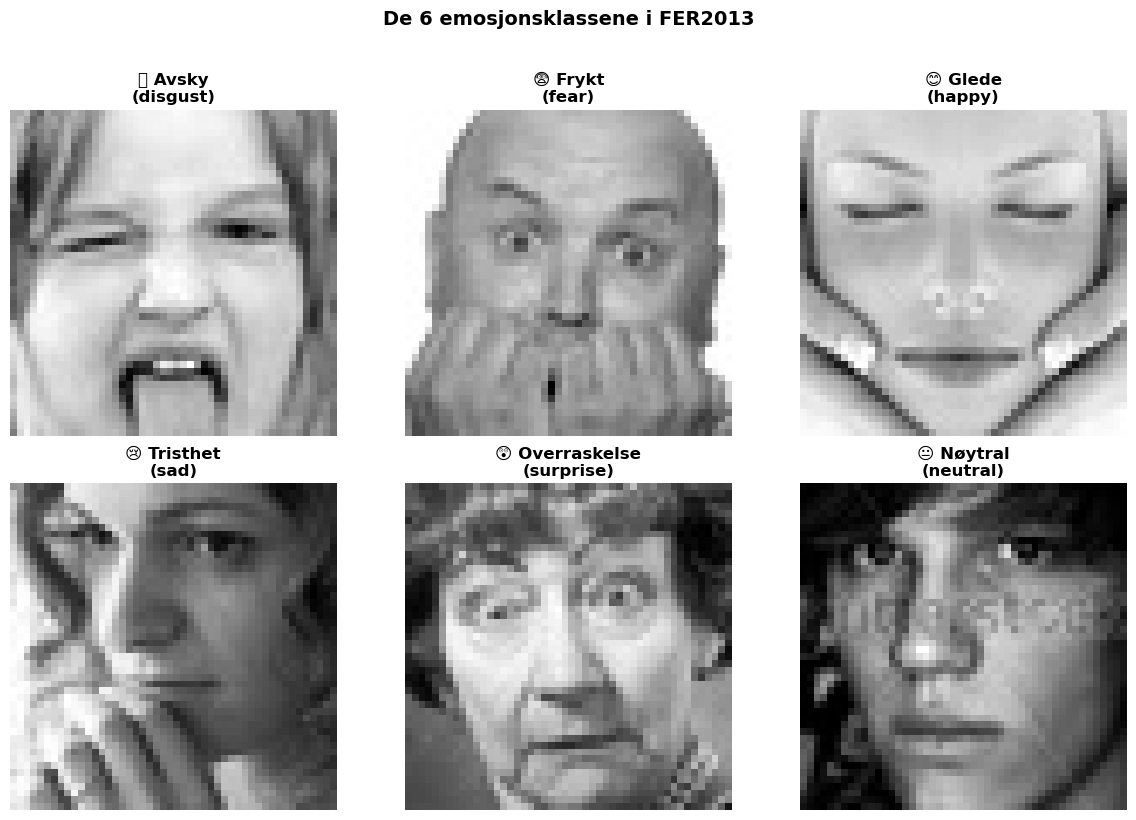


💾 Figur lagret til: ../ressurser/fer2013_emosjoner_eksempler.png

💡 Disse emosjonsklassene brukes i:
   • E2-emosjoner-trening.ipynb
   • E3-emosjoner-evaluering.ipynb


In [15]:
def vis_emosjonseksempler():
    """
    Visualiser eksempler fra hver emosjonsklasse med norske navn.
    """
    data_dir = Path("../data/ansiktsuttrykk/FER2013")
    
    # Norske og engelske klassenavn
    klasser = {
        'disgust':  ('Avsky',        '🤢'),
        'fear':     ('Frykt',        '😨'),
        'happy':    ('Glede',        '😊'),
        'sad':      ('Tristhet',     '😢'),
        'surprise': ('Overraskelse', '😲'),
        'neutral':  ('Nøytral',      '😐')
    }
    
    # Finn bilder for hver klasse
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()
    
    print("📸 Emosjonseksempler fra FER2013")
    print("=" * 50)
    
    for idx, (eng_name, (norsk_name, emoji)) in enumerate(klasser.items()):
        ax = axes[idx]
        
        # Søk i train og test mapper
        images = []
        for split in ['train', 'test']:
            split_dir = data_dir / split / eng_name
            if split_dir.exists():
                images.extend(list(split_dir.glob("*.jpg")) + list(split_dir.glob("*.png")))
        
        if images:
            # Vis et tilfeldig bilde
            img_path = np.random.choice(images[:min(100, len(images))])
            img = Image.open(img_path).convert('L')
            
            ax.imshow(np.array(img), cmap='gray')
            ax.set_title(f'{emoji} {norsk_name}\n({eng_name})', fontsize=12, fontweight='bold')
            ax.axis('off')
            
            print(f"  {emoji} {norsk_name:12s} ({eng_name:10s}): {len(images):>5} bilder")
        else:
            ax.text(0.5, 0.5, f'{emoji}\n{norsk_name}\n(ingen bilder)', 
                   ha='center', va='center', fontsize=10, transform=ax.transAxes)
            ax.axis('off')
            print(f"  {emoji} {norsk_name:12s} ({eng_name:10s}): ❌ Ingen bilder funnet")
    
    plt.suptitle('De 6 emosjonsklassene i FER2013', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('../ressurser/fer2013_emosjoner_eksempler.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n💾 Figur lagret til: ../ressurser/fer2013_emosjoner_eksempler.png")
    print("\n💡 Disse emosjonsklassene brukes i:")
    print("   • E2-emosjoner-trening.ipynb")
    print("   • E3-emosjoner-evaluering.ipynb")

# Kjør visualisering hvis data finnes
if data_ready:
    vis_emosjonseksempler()
else:
    print("⚠️ Datasettet er ikke lastet ned ennå.")
    print("   Kjør hent_fer2013_dataset() først!")

In [16]:
def load_emotion_data(data_dir, test_size=0.2, val_size=0.2):
    """Last og splitt emosjonsdatasett"""
    
    # Emosjonsklasser
    emotion_classes = {
        0: 'disgust', 
        1: 'fear',
        2: 'happy',
        3: 'sad',
        4: 'surprise',
        5: 'neutral'
    }
    
    # Samle alle bilde-sti og etiketter
    image_paths = []
    labels = []
    
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(data_dir, split)
        if os.path.exists(split_dir):
            for emotion_name in emotion_classes.values():
                emotion_dir = os.path.join(split_dir, emotion_name)
                if os.path.exists(emotion_dir):
                    for filename in os.listdir(emotion_dir):
                        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                            image_paths.append(os.path.join(emotion_dir, filename))
                            # Finn emosjonsindeks
                            emotion_idx = [k for k, v in emotion_classes.items() if v == emotion_name][0]
                            labels.append(emotion_idx)
    
    print(f"Totalt bilder funnet: {len(image_paths)}")
    print(f"Emosjoner: {list(emotion_classes.values())}")
    print(f"Bilder per emosjon: {np.bincount(labels)}")
    
    # Splitt data hvis nødvendig
    if len(set(labels)) > 1:  # Sjekk om vi har flere klasser
        X_train, X_temp, y_train, y_temp = train_test_split(
            image_paths, labels, test_size=test_size + val_size, 
            random_state=42, stratify=labels
        )
        
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=test_size/(test_size + val_size),
            random_state=42, stratify=y_temp
        )
    else:
        # Fallback hvis vi bare har én klasse
        X_train, X_val, X_test = image_paths, image_paths, image_paths
        y_train, y_val, y_test = labels, labels, labels
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test), list(emotion_classes.values())

In [17]:
# Data transformasjoner
train_transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normaliser gråtoner
])

val_transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

print("✅ Data transformasjoner definert!")

✅ Data transformasjoner definert!


## 2. CNN Modell for Emosjonsgjenkjenning

In [18]:
class EmotionNet(nn.Module):
    """CNN for emosjonsklassifikasjon"""
    
    emotion_classes = {
        0: 'disgust', 
        1: 'fear',
        2: 'happy',
        3: 'sad',
        4: 'surprise',
        5: 'neutral'
    }
    
    def __init__(self, num_classes=len(emotion_classes), dropout_rate=0.5):
        super(EmotionNet, self).__init__()
        
        # Feature extraction layers
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.25),
            
            # Block 2  
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.25),
            
            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.25),
            
            # Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.25),
        )
        
        # Adaptive pooling for ulike input-størrelser
        self.adaptive_pool = nn.AdaptiveAvgPool2d((3, 3))
        
        # Klassifikator
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 3 * 3, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.adaptive_pool(x)
        x = self.classifier(x)
        return x

### 🧠 Forklaring av EmotionNet arkitekturen

**EmotionNet** er en CNN spesielt designet for emosjonsgjenkjenning:

---

#### Arkitektur-oversikt

```
INPUT (48×48×1)        Gråtone ansiktsbilde
      │
      ▼
┌─────────────────┐
│  BLOCK 1        │    Conv2d(1→32) → BatchNorm → ReLU → MaxPool → Dropout
│  32 filtre      │    Output: 24×24×32
└─────────────────┘
      │
      ▼
┌─────────────────┐
│  BLOCK 2        │    Conv2d(32→64) → BatchNorm → ReLU → MaxPool → Dropout
│  64 filtre      │    Output: 12×12×64
└─────────────────┘
      │
      ▼
┌─────────────────┐
│  BLOCK 3        │    Conv2d(64→128) → BatchNorm → ReLU → MaxPool → Dropout
│  128 filtre     │    Output: 6×6×128
└─────────────────┘
      │
      ▼
┌─────────────────┐
│  BLOCK 4        │    Conv2d(128→256) → BatchNorm → ReLU → MaxPool → Dropout
│  256 filtre     │    Output: 3×3×256
└─────────────────┘
      │
      ▼
┌─────────────────┐
│  CLASSIFIER     │    Flatten → FC(2304→512) → FC(512→256) → FC(256→6)
│  6 klasser      │
└─────────────────┘
      │
      ▼
OUTPUT: Sannsynligheter for hver emosjon
        [Avsky, Frykt, Glede, Tristhet, Overraskelse, Nøytral]
```

---

#### Hva lærer hvert lag?

| Lag | Hva det lærer | Medisinsk parallell |
|-----|---------------|---------------------|
| **Block 1** | Kanter, linjer | Konturer i røntgen |
| **Block 2** | Enkle former | Anatomiske strukturer |
| **Block 3** | Ansiktstrekk (øyne, munn) | Organer, lesjoner |
| **Block 4** | Komplekse mønstre | Patologiske mønstre |

---

#### Regulariseringsteknikker

| Teknikk | Hva det gjør | Hvorfor viktig |
|---------|--------------|----------------|
| **BatchNorm** | Normaliserer aktivering | Stabiliserer trening |
| **Dropout2d** | Slår av tilfeldige kanaler | Hindrer overfit |
| **Dropout** | Slår av tilfeldige nevroner | Robusthet |

---

#### Parameterfordeling

```
Layer                    Parametere
─────────────────────────────────────
Conv Block 1:                 896
Conv Block 2:               18,624
Conv Block 3:               74,112
Conv Block 4:              295,424
Classifier:             1,317,382
─────────────────────────────────────
TOTALT:                ~1,706,438
```

> 💡 **Merk:** De fleste parameterne (77%) er i klassifikatoren, ikke i konvolusjonene!

## 3. Treningsfunksjoner

I denne seksjonen definerer vi funksjonene som brukes til å trene modellen.

### Treningsløkke

For hver **epoke** (gjennomgang av hele treningsdatasettet):

1. **Forward pass**: Beregn prediksjoner
2. **Tap-beregning**: Sammenlign med fasit (Cross-Entropy Loss)
3. **Backward pass**: Beregn gradienter via backpropagation
4. **Oppdater vekter**: Juster parameterne (Adam optimizer)

```
┌─────────────────────────────────────────────────────────────────┐
│                     TRENINGSLØKKE                               │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│   for epoke in range(num_epochs):                              │
│       ┌─────────────────────────────────────────────────────┐   │
│       │  TRENING                                            │   │
│       │  for batch in train_loader:                         │   │
│       │      1. Forward:  ŷ = model(X)                      │   │
│       │      2. Loss:     L = CrossEntropy(ŷ, y)            │   │
│       │      3. Backward: ∂L/∂θ                             │   │
│       │      4. Update:   θ = θ - α * ∂L/∂θ                 │   │
│       └─────────────────────────────────────────────────────┘   │
│       ┌─────────────────────────────────────────────────────┐   │
│       │  VALIDERING (ingen gradient-oppdatering)            │   │
│       │  for batch in val_loader:                           │   │
│       │      ŷ = model(X)                                   │   │
│       │      val_loss = CrossEntropy(ŷ, y)                  │   │
│       └─────────────────────────────────────────────────────┘   │
│                                                                 │
│   if val_loss ikke forbedres → Early Stopping                   │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
```

### Cross-Entropy Loss for flerklasse

For emosjonsklassifikasjon med 6 klasser:

$$L = -\sum_{i=1}^{6} y_i \log(\hat{y}_i)$$

Hvor $y_i$ er one-hot target og $\hat{y}_i$ er predikert sannsynlighet.

In [19]:
def train_epoch(model, dataloader, criterion, optimizer, device):
    """Tren model for én epoke"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(dataloader, desc="Training"):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    
    return epoch_loss, epoch_acc

def validate_epoch(model, dataloader, criterion, device):
    """Valider model for én epoke"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    
    return epoch_loss, epoch_acc

In [20]:
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=0.001):
    """Tren den fullstendige modellen"""
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)
    
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    best_val_acc = 0.0
    patience_counter = 0
    
    print("Starter trening...")
    print("=" * 50)
    
    for epoch in range(num_epochs):
        print(f"\nEpoke {epoch+1}/{num_epochs}")
        print("-" * 30)
        
        # Train
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validate
        val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)
        
        # Update learning rate
        scheduler.step(val_loss)
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")
        
        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), './modeller/best_emotion_model.pth')
        else:
            patience_counter += 1
            
        if patience_counter >= 10:
            print(f"\nEarly stopping at epoch {epoch+1}")
            break
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses, 
        'train_accs': train_accs,
        'val_accs': val_accs,
        'best_val_acc': best_val_acc
    }

## 4. Hovedkjøring - Del 1

In [21]:
# Hovedkjøring med automatisk oppsett
def main_part1():
    """Hovedkjøring del 1: Data lasting og modell oppsett"""
    
    print(" Ansiktsutrykk-klassifikasjon med CNN - Del 1")
    print("=" * 60)
    
    # Sett opp data-mapper
    data_dir = "../data/ansiktsuttrykk/FER2013"
    
    # Sjekk om data eksisterer
    if not os.path.exists(data_dir) or len(os.listdir(data_dir)) == 0:
        print("❌ Data directory not found or empty!")
        print("\n🔄 Prøver automatisk oppsett...")
        
        # Prøv automatisk nedlasting
        success = hent_fer2013_dataset()
        
        if not success:
            print("\n❌ Automatisk oppsett feilet!")
            print("\n📋 Manuell nedlasting:")
            print("1. Gå til: https://www.kaggle.com/datasets/msambare/fer2013")
            print("2. Last ned 'fer2013.zip'")
            print("3. Ekstraher til '../data/ansiktsuttrykk/' mappen")
            return None, None, None, None, None
    else:
        print("✅ Data-katalog funnet!")
    
    # Last data
    print("\n Laster data...")
    (X_train, y_train), (X_val, y_val), (X_test, y_test), class_names = load_emotion_data(data_dir)
    
    # Etabler datasett
    print("\n🔧 Etablerer trening-, validering- og test-datasett...")
    train_dataset = EmotionDataset(X_train, y_train, train_transform)
    val_dataset = EmotionDataset(X_val, y_val, val_transform)
    test_dataset = EmotionDataset(X_test, y_test, val_transform)
    
    # Etabler data-laster 
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
    
    print(f"✅ Lasting av data vellykket!")
    print(f"Trening: {len(train_dataset)} bilder")
    print(f"Validering: {len(val_dataset)} bilder") 
    print(f"Test: {len(test_dataset)} bilder")
    
    # Bygg modell
    print("\n��️ Bygger modell...")
    model = EmotionNet(num_classes=len(class_names)).to(device)
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    return model, train_loader, val_loader, test_loader, class_names



In [22]:
# Kjør hovedkjøring
model, train_loader, val_loader, test_loader, class_names = main_part1()

 Ansiktsutrykk-klassifikasjon med CNN - Del 1
✅ Data-katalog funnet!

 Laster data...
Totalt bilder funnet: 30934
Emosjoner: ['disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
Bilder per emosjon: [ 547 5121 8989 6077 4002 6198]

🔧 Etablerer trening-, validering- og test-datasett...
✅ Lasting av data vellykket!
Trening: 18560 bilder
Validering: 6187 bilder
Test: 6187 bilder

��️ Bygger modell...
Model parameters: 1,701,830


In [23]:
# Vis modellstruktur
print("\n📊 Modell Sammendrag:")
print("=" * 50)

# Test modellen med dummy input først
print("🧪 Tester modell med dummy input...")
try:
    dummy_input = torch.randn(1, 1, 48, 48).to(device)
    with torch.no_grad():
        output = model(dummy_input)
    print(f"✅ Modell test vellykket!")
    print(f"Input shape: {dummy_input.shape}")
    print(f"Output shape: {output.shape}")
    print(f"Output device: {output.device}")
except Exception as e:
    print(f"❌ Modell test feilet: {e}")

# Vis modellstruktur manuelt
print(f"\n📋 Modell Detaljer:")
print(f"Modell: {model}")
print(f"Enhet: {device}")
print(f"Input størrelse: (batch_size, 1, 48, 48)")
print(f"Output størrelse: (batch_size, {len(class_names)})")

# Prøv torchsummary hvis modellen fungerer
try:
    from torchsummary import summary
    # Sørg for at modellen er på CPU for torchsummary
    model_cpu = model.cpu()
    summary(model_cpu, input_size=(1, 48, 48))  # (kanaler, høyde, bredde)
    # Flytt modellen tilbake til riktig enhet
    model = model.to(device)
except ImportError:
    print("\n⚠️ torchsummary ikke tilgjengelig - installer med: pip install torchsummary")
except Exception as e:
    print(f"\n⚠️ torchsummary feilet: {e}")
    print("Bruker manuell modellvisning i stedet")


📊 Modell Sammendrag:
🧪 Tester modell med dummy input...
✅ Modell test vellykket!
Input shape: torch.Size([1, 1, 48, 48])
Output shape: torch.Size([1, 6])
Output device: mps:0

📋 Modell Detaljer:
Modell: EmotionNet(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout2d(p=0.25, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum

## 📋 Oppsummering av Del 1

I denne notebooken har vi:

| Steg | Beskrivelse | Status |
|------|-------------|--------|
| 1. **Miljøoppsett** | Fungerer både lokalt og i Colab | ✅ |
| 2. **FER2013 nedlasting** | Automatisk via Kaggle API | ✅ |
| 3. **Datasettanalyse** | 6 emosjonsklasser med norske navn | ✅ |
| 4. **CNN-arkitektur** | EmotionNet med ~1.7M parametere | ✅ |
| 5. **Treningsfunksjoner** | Train/validate med early stopping | ✅ |

---

### De 6 emosjonsklassene (oppsummering)

```
Klasse  Norsk          Engelsk      Emoji
──────────────────────────────────────────
  0     Avsky          disgust       🤢
  1     Frykt          fear          😨  
  2     Glede          happy         😊
  3     Tristhet       sad           😢
  4     Overraskelse   surprise      😲
  5     Nøytral        neutral       😐
```

---

## ➡️ Neste steg

| Notebook | Innhold |
|----------|---------|
| **E2-emosjoner-trening.ipynb** | Trening av EmotionNet, læringskurver, hyperparameter-tuning |
| **E3-emosjoner-evaluering.ipynb** | Forvirringsmatrise, Grad-CAM, feiltolkning, etiske aspekter |

---

## 🏥 Klinisk relevans

Teknikkene i denne notebook-serien er direkte overførbare til:

- **Psykiatrisk screening**: Automatisk stemningsvurdering
- **Smertebehandling**: Objektiv smerteskår fra ansiktsuttrykk
- **Nevrologisk diagnostikk**: Oppdage maskefjes ved Parkinsons
- **Telemedisin**: Støtte for fjernkonsultasjoner

> 💡 **Viktig**: I klinisk praksis må slike verktøy alltid brukes som *støtte* for klinikeren, ikke som erstatning for klinisk vurdering!